In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salvicnlp-2025/Test Data/BG/input-file.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240904_EUZ_BG_46.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240627_EUZ_BG_64.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240417_URW_BG_79.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240301_SHG_BG_59.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240726_EUZ_BG_51.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240216_URW_BG_92.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20231124_IHC_BG_35.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240216_URW_BG_89.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240321_URW_BG_82.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240327_EUZ_BG_98.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240321_URW_BG_66.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240327_EUZ_BG_96

## Train Data

In [2]:
import pandas as pd
import os

# Paths
ANNOTATION_PATH = '/kaggle/input/salvicnlp-2025/Train Data/BG/subtask-1-annotations.txt'
RAW_TEXT_DIR = '/kaggle/input/salvicnlp-2025/Train Data/BG/raw-documents'

# Read annotation file
df = pd.read_csv(
    ANNOTATION_PATH,
    sep='\t',
    header=None,
    names=['file_name', 'start', 'end', 'label']
)

# Prepare a column for the extracted text
df['text'] = ''

for file_name in df['file_name'].unique():
    file_path = os.path.join(RAW_TEXT_DIR, file_name)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'r', encoding='utf-8') as f:
        full_text = f.read()
    for idx, row in df[df['file_name'] == file_name].iterrows():
        start = int(row['start'])
        end = int(row['end'])
        # Find the previous and next newline
        prev_nl = full_text.rfind('\n', 0, start)
        next_nl = full_text.find('\n', end)
        # Adjust indices to include the full line
        span_start = prev_nl + 1 if prev_nl != -1 else 0
        span_end = next_nl if next_nl != -1 else len(full_text)
        sentence = full_text[span_start:span_end].strip()
        df.at[idx, 'text'] = sentence

print(df[['file_name', 'start', 'end', 'label', 'text']].head())

                file_name  start   end  label  \
0  20240704_URW_BG_30.txt      0    61  False   
1  20240704_URW_BG_30.txt     65   141  False   
2  20240704_URW_BG_30.txt    145   208  False   
3  20240704_URW_BG_30.txt    212   645  False   
4  20240704_URW_BG_30.txt    649  1110  False   

                                                text  
0  ПРЕДСТАВЯНЕ НА ПОЗИЦИЯТА НА РЕПУБЛИКА БЪЛГАРИЯ...  
1  Моля, от вносителите, заповядайте, госпожо Вас...  
2  ВИКТОРИЯ ВАСИЛЕВА (ВЕЛИЧИЕ): Благодаря Ви, гос...  
3  Уважаеми господин служебен Министър-председате...  
4  Не трябва да забравяме, че ангажираността и чл...  


In [3]:
# Function to keep only text before first double newline
def remove_after_double_newline(text):
    if pd.isna(text):
        return text
    return text.split('\n\n', 1)[0]

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_after_double_newline)

In [4]:
df.head()

,file_name,start,end,label,text
0,20240704_URW_BG_30.txt,0,61,False,ПРЕДСТАВЯНЕ НА ПОЗИЦИЯТА НА РЕПУБЛИКА БЪЛГАРИЯ...
1,20240704_URW_BG_30.txt,65,141,False,"Моля, от вносителите, заповядайте, госпожо Вас..."
2,20240704_URW_BG_30.txt,145,208,False,"ВИКТОРИЯ ВАСИЛЕВА (ВЕЛИЧИЕ): Благодаря Ви, гос..."
3,20240704_URW_BG_30.txt,212,645,False,Уважаеми господин служебен Министър-председате...
4,20240704_URW_BG_30.txt,649,1110,False,"Не трябва да забравяме, че ангажираността и чл..."


In [5]:
df.iloc[300]['text']

'Ей, хора, с тази тема не си играйте, ще взривите държавата! Каквото има, трябва да го знаят всички. Не може само Борисов, Пеевски и Петков да знаят, а другите да стоим и да гадаем какво се случва. Всички имаме достъп до информация и всички ще четем – не лидери, не председатели на комисии, всички народни представители. Темата е сериозна и не се подигравайте с българските граждани.'

## Trail Data

In [6]:
import pandas as pd
import os

# Paths
ANNOTATION_PATH = '/kaggle/input/salvicnlp-2025/TRIAL-ANNOTATED/BG/subtask-1-annotations.txt'
RAW_TEXT_DIR = '/kaggle/input/salvicnlp-2025/TRIAL-ANNOTATED/BG/raw-documents'

# Read annotation file
trial_df = pd.read_csv(
    ANNOTATION_PATH,
    sep='\t',
    header=None,
    names=['file_name', 'start', 'end', 'label']
)

# Prepare a column for the extracted text
trial_df['text'] = ''

for file_name in trial_df['file_name'].unique():
    file_path = os.path.join(RAW_TEXT_DIR, file_name)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'r', encoding='utf-8') as f:
        full_text = f.read()
    for idx, row in trial_df[trial_df['file_name'] == file_name].iterrows():
        start = int(row['start'])
        end = int(row['end'])
        # Find the previous and next newline
        prev_nl = full_text.rfind('\n', 0, start)
        next_nl = full_text.find('\n', end)
        # Adjust indices to include the full line
        span_start = prev_nl + 1 if prev_nl != -1 else 0
        span_end = next_nl if next_nl != -1 else len(full_text)
        sentence = full_text[span_start:span_end].strip()
        trial_df.at[idx, 'text'] = sentence

print(trial_df[['file_name', 'start', 'end', 'label', 'text']].head())

        file_name  start   end  label  \
0  trail_BG_1.txt      0    57  False   
1  trail_BG_1.txt     61   413  False   
2  trail_BG_1.txt    417   996  False   
3  trail_BG_1.txt   1000  1581  False   
4  trail_BG_1.txt   1585  2168  False   

                                                text  
0  АНДРЕЙ ЧОРБАНОВ (ИТН): Благодаря Ви, госпожо П...  
1  Уважаеми дами и господа народни представители!...  
2  Ще обясня накратко защо това е така. Какво пре...  
3  А какво ще бъде то? Ако имаме десет цени, на к...  
4  Втори обаче много по-важен въпрос е липсата на...  


In [7]:
# Function to keep only text before first double newline
def remove_after_double_newline(text):
    if pd.isna(text):
        return text
    return text.split('\n\n', 1)[0]

# Apply the function to the 'text' column
trial_df['text'] = trial_df['text'].apply(remove_after_double_newline)

In [8]:
trial_df.head()

,file_name,start,end,label,text
0,trail_BG_1.txt,0,57,False,"АНДРЕЙ ЧОРБАНОВ (ИТН): Благодаря Ви, госпожо П..."
1,trail_BG_1.txt,61,413,False,Уважаеми дами и господа народни представители!...
2,trail_BG_1.txt,417,996,False,Ще обясня накратко защо това е така. Какво пре...
3,trail_BG_1.txt,1000,1581,False,"А какво ще бъде то? Ако имаме десет цени, на к..."
4,trail_BG_1.txt,1585,2168,False,Втори обаче много по-важен въпрос е липсата на...


In [9]:
df = pd.concat([df, trial_df], ignore_index=True)

In [10]:
df.head()

,file_name,start,end,label,text
0,20240704_URW_BG_30.txt,0,61,False,ПРЕДСТАВЯНЕ НА ПОЗИЦИЯТА НА РЕПУБЛИКА БЪЛГАРИЯ...
1,20240704_URW_BG_30.txt,65,141,False,"Моля, от вносителите, заповядайте, госпожо Вас..."
2,20240704_URW_BG_30.txt,145,208,False,"ВИКТОРИЯ ВАСИЛЕВА (ВЕЛИЧИЕ): Благодаря Ви, гос..."
3,20240704_URW_BG_30.txt,212,645,False,Уважаеми господин служебен Министър-председате...
4,20240704_URW_BG_30.txt,649,1110,False,"Не трябва да забравяме, че ангажираността и чл..."


In [11]:
len(df)

438

## Test Data

In [12]:
import pandas as pd
import os

# Paths
ANNOTATION_PATH = '/kaggle/input/salvicnlp-2025/Test Data/BG/input-file.txt'
RAW_TEXT_DIR = '/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents'

# Read annotation file
test_df = pd.read_csv(
    ANNOTATION_PATH,
    sep='\t',
    header=None,
    names=['file_name', 'start', 'end']
)

# Prepare a column for the extracted text
test_df['text'] = ''

for file_name in test_df['file_name'].unique():
    file_path = os.path.join(RAW_TEXT_DIR, file_name)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'r', encoding='utf-8') as f:
        full_text = f.read()
    for idx, row in test_df[test_df['file_name'] == file_name].iterrows():
        start = int(row['start'])
        end = int(row['end'])
        # Find the previous and next newline
        prev_nl = full_text.rfind('\n', 0, start)
        next_nl = full_text.find('\n', end)
        # Adjust indices to include the full line
        span_start = prev_nl + 1 if prev_nl != -1 else 0
        span_end = next_nl if next_nl != -1 else len(full_text)
        sentence = full_text[span_start:span_end].strip()
        test_df.at[idx, 'text'] = sentence

print(test_df[['file_name', 'start', 'end', 'text']].head())

                file_name  start   end  \
0  20240228_URW_BG_86.txt      0   190   
1  20240228_URW_BG_86.txt    192   574   
2  20240228_URW_BG_86.txt    576  1258   
3  20240228_URW_BG_86.txt   1260  1503   
4  20240228_URW_BG_86.txt   1505  1560   

                                                text  
0  ЯВОР БОЖАНКОВ (ПП-ДБ): Уважаеми господин Предс...  
1  Докато тя извършва агресивни действия в Украйн...  
2  Депутат от ГЕРБ зададе въпрос към министър Таг...  
3  Вместо да сложим край на това днес и да кажем,...  
4  КОСТАДИН КОСТАДИНОВ (ВЪЗРАЖДАНЕ, от място): Не...  


In [13]:
# Apply the function to the 'text' column
test_df['text'] = test_df['text'].apply(remove_after_double_newline)

In [14]:
len(test_df)

1361

In [15]:
%%capture
%pip install Dataset
%pip install transformers
%pip install sentencepiece
%pip install datasets
%pip install huggingface_hub
%pip install bitsandbytes
%pip install -U accelerate
%pip install -U peft
%pip install -U trl

In [16]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score
from sklearn.model_selection import train_test_split
from transformers import (
    AutoModelForSequenceClassification, 
    AutoTokenizer, 
    TrainingArguments, 
    Trainer,
    EarlyStoppingCallback
)
from datasets import Dataset
import os
from tqdm import tqdm

2025-05-06 03:09:47.787240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746500988.041573      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746500988.110729      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
# Set seed for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
set_seed()

In [18]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
HUGGINGFACE_TOKEN = user_secrets.get_secret("HUGGINGFACE_TOKEN")

!huggingface-cli login --token $HUGGINGFACE_TOKEN

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
The token `basic task` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `basic task`


In [19]:
len(df)

438

In [20]:
train_df = df[:350]
eval_df = df[351:]

In [21]:
print(f"Training set size: {len(train_df)}")
print(f"Evaluation set size: {len(eval_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 350
Evaluation set size: 87
Test set size: 1361


## Check Token Legth

In [22]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('FacebookAI/xlm-roberta-large')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [23]:
# Compute token lengths for each text
token_lengths = train_df['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))
max_token_length = token_lengths.max()
avg_token_length = token_lengths.mean()
print(max_token_length)
print(avg_token_length)

Token indices sequence length is longer than the specified maximum sequence length for this model (2597 > 512). Running this sequence through the model will result in indexing errors


2597
104.05142857142857


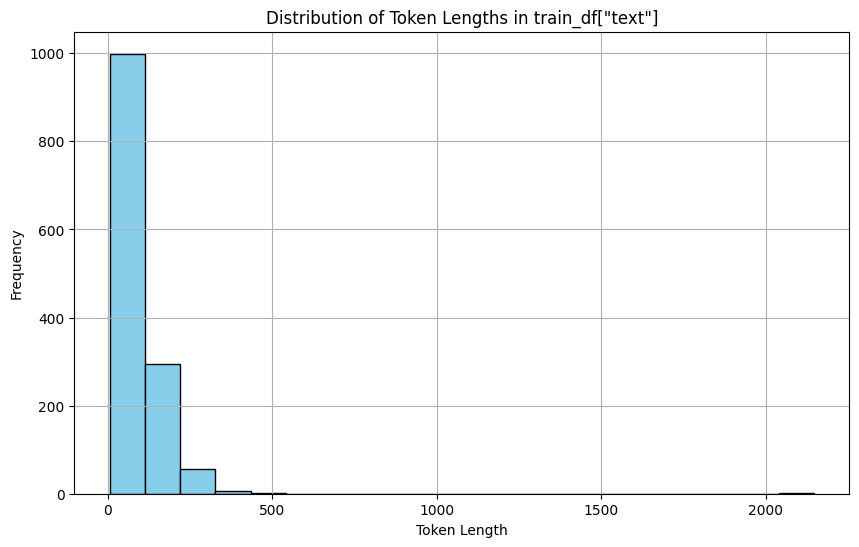

In [24]:
# Compute token lengths for each text
test_df['token_length'] = test_df['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))

# Plot histogram of token lengths
plt.figure(figsize=(10,6))
plt.hist(test_df['token_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Lengths in train_df["text"]')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [25]:
train_df['label'] = train_df['label'].map({True: 1, False: 0})
eval_df['label'] = eval_df['label'].map({True: 1, False: 0})

/tmp/ipykernel_31/3147424746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['label'] = train_df['label'].map({True: 1, False: 0})
/tmp/ipykernel_31/3147424746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_df['label'] = eval_df['label'].map({True: 1, False: 0})


In [26]:
print(f"Number of labels in train {train_df['label'].value_counts()}")
print(f"Number of labels in eval {eval_df['label'].value_counts()}")

Number of labels in train label
0    188
1    162
Name: count, dtype: int64
Number of labels in eval label
0    69
1    18
Name: count, dtype: int64


In [27]:
# Function to compute metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

## Models

In [28]:
# Function to train a model
def train_model(model_name, train_dataset, eval_dataset, output_dir):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)
    
    # Tokenize datasets
    tokenized_train = train_dataset.map(tokenize_function, batched=True)
    tokenized_eval = eval_dataset.map(tokenize_function, batched=True)
    
    # Load model
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, 
        num_labels=2
    )
    
    # Define training arguments
    training_args = TrainingArguments(
        output_dir=output_dir,
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        num_train_epochs=5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        push_to_hub=False,
        report_to="none",
    )
    
    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_eval,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )
    
    # Train the model
    trainer.train()
    
    # Save model and tokenizer
    trainer.save_model(output_dir)
    tokenizer.save_pretrained(output_dir)
    
    return trainer, tokenizer

In [29]:
# Convert to HF datasets
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)
test_dataset = Dataset.from_pandas(test_df)

In [30]:
# Define models for ensemble
models = [
    # ("classla/bcms-bertic", "./classla_bcms_BG"),
    # ("FacebookAI/xlm-roberta-large", "./xlmroberta_BG"),
    ("usmiva/bert-web-bg", "./usmiva_bert_web_BG"),
    # ("DeepPavlov/bert-base-bg-cs-pl-ru-cased", "./rmihaylov"),
]

In [31]:
# Train all models
trained_models = []
for model_name, output_dir in models:
    print(f"Training {model_name}...")
    trainer, tokenizer = train_model(model_name, train_dataset, eval_dataset, output_dir)
    trained_models.append((trainer, tokenizer, output_dir))
    print(f"Finished training {model_name}")

Training usmiva/bert-web-bg...


tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/390k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

Map:   0%|          | 0/87 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at usmiva/bert-web-bg and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.530987,0.735632,0.581818,0.432432,0.888889
2,No log,0.576730,0.758621,0.588235,0.454545,0.833333
3,No log,1.035617,0.747126,0.592593,0.444444,0.888889
4,No log,1.103172,0.747126,0.592593,0.444444,0.888889
5,No log,0.956123,0.758621,0.588235,0.454545,0.833333


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Finished training usmiva/bert-web-bg


In [32]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

In [33]:
tokenized_eval = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/87 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


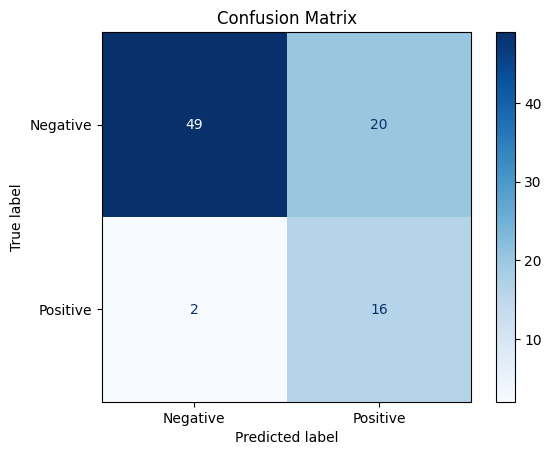

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the evaluation dataset
predictions = trainer.predict(tokenized_eval)

# Extract true and predicted labels
true_labels = predictions.label_ids
predicted_labels = np.argmax(predictions.predictions, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [35]:
_, tokenizer, output_dir = trained_models[0] 

In [36]:
# Load the saved model
model = AutoModelForSequenceClassification.from_pretrained(output_dir)

In [37]:
model_name = "mahsharyahan/usmiva_bert_web_BG_St_1"
# tokenizer.push_to_hub(model_name)
trainer.push_to_hub(model_name)

training_args.bin:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/mahsharyahan/usmiva_bert_web_BG/commit/a567e0813bc82012ce7773c96c0b254e688b6bfe', commit_message='mahsharyahan/usmiva_bert_web_BG_St_1', commit_description='', oid='a567e0813bc82012ce7773c96c0b254e688b6bfe', pr_url=None, repo_url=RepoUrl('https://huggingface.co/mahsharyahan/usmiva_bert_web_BG', endpoint='https://huggingface.co', repo_type='model', repo_id='mahsharyahan/usmiva_bert_web_BG'), pr_revision=None, pr_num=None)

In [38]:
# Define models for ensemble
model_names = [
    "mahsharyahan/classla_bcms_BG",
    "mahsharyahan/xlmroberta_BG",
    "mahsharyahan/usmiva_bert_web_BG"
]

In [39]:
# Function to get predictions from a model
def get_predictions(model_name, dataset):
    print(f"Getting predictions from {model_name}...")
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    model.eval()
    
    # Tokenize the dataset
    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)
    
    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    
    # Create a Trainer for prediction
    trainer = Trainer(
        model=model,
        args=TrainingArguments(
            output_dir="./tmp_trainer",
            per_device_eval_batch_size=16,
            report_to="none",
        ),
    )
    
    # Get predictions
    raw_predictions = trainer.predict(tokenized_dataset)
    
    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(
        torch.tensor(raw_predictions.predictions), dim=-1
    ).numpy()
    
    return probabilities

In [40]:
# Get predictions from all models for evaluation dataset
eval_predictions = []
for model_name in model_names:
    probabilities = get_predictions(model_name, eval_dataset)
    eval_predictions.append(probabilities)

Getting predictions from mahsharyahan/classla_bcms_BG...


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/231k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/734k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

Map:   0%|          | 0/87 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Getting predictions from mahsharyahan/xlmroberta_BG...


tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Map:   0%|          | 0/87 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Getting predictions from mahsharyahan/usmiva_bert_web_BG...


tokenizer_config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/390k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/652 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Map:   0%|          | 0/87 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [41]:
# Get predictions from all models for test dataset
test_predictions = []
for model_name in model_names:
    probabilities = get_predictions(model_name, test_dataset)
    test_predictions.append(probabilities)

Getting predictions from mahsharyahan/classla_bcms_BG...


Map:   0%|          | 0/1361 [00:00<?, ? examples/s]

Getting predictions from mahsharyahan/xlmroberta_BG...


Map:   0%|          | 0/1361 [00:00<?, ? examples/s]

Getting predictions from mahsharyahan/usmiva_bert_web_BG...


Map:   0%|          | 0/1361 [00:00<?, ? examples/s]

In [43]:
# Try different weight combinations to find the best F1 score on eval set
best_f1 = 0
best_weights = [0.3, 0.4, 0.3]  # Default equal weights

weight_options = [
    [0.4, 0.1, 0.5],
    [0.5, 0.25, 0.25],
    [0.33, 0.33, 0.34],
    [0.6, 0.2, 0.2],
    [0.2, 0.4, 0.4],
    [0.2, 0.6, 0.2]
]

print("Finding optimal weights based on evaluation set performance...")
for weights in weight_options:
    # Ensemble predictions with current weights
    ensemble_probs = np.zeros_like(eval_predictions[0])
    for i, pred in enumerate(eval_predictions):
        ensemble_probs += weights[i] * pred
    
    # Calculate metrics
    predictions = np.argmax(ensemble_probs, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        eval_df['label'], 
        predictions, 
        average='binary'
    )
    
    print(f"Weights {weights}: F1 = {f1:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_weights = weights

print(f"\nBest weights found: {best_weights} with F1: {best_f1:.4f}")

Finding optimal weights based on evaluation set performance...
Weights [0.4, 0.1, 0.5]: F1 = 0.5926, Precision = 0.4444, Recall = 0.8889
Weights [0.5, 0.25, 0.25]: F1 = 0.5926, Precision = 0.4444, Recall = 0.8889
Weights [0.33, 0.33, 0.34]: F1 = 0.5926, Precision = 0.4444, Recall = 0.8889
Weights [0.6, 0.2, 0.2]: F1 = 0.6071, Precision = 0.4474, Recall = 0.9444
Weights [0.2, 0.4, 0.4]: F1 = 0.5926, Precision = 0.4444, Recall = 0.8889
Weights [0.2, 0.6, 0.2]: F1 = 0.6038, Precision = 0.4571, Recall = 0.8889

Best weights found: [0.6, 0.2, 0.2] with F1: 0.6071


In [57]:
# Use best weights for final ensemble on evaluation set
eval_ensemble_probs = np.zeros_like(eval_predictions[0])
for i, pred in enumerate(eval_predictions):
    eval_ensemble_probs += best_weights[i] * pred

eval_predictions_final = np.argmax(eval_ensemble_probs, axis=1)
eval_precision, eval_recall, eval_f1, _ = precision_recall_fscore_support(
    eval_df['label'], 
    eval_predictions_final, 
    average='binary'
)
eval_accuracy = accuracy_score(eval_df['label'], eval_predictions_final)

print("\nFinal Evaluation Set Results:")
print(f"F1 Score: {eval_f1:.4f}")
print(f"Precision: {eval_precision:.4f}")
print(f"Recall: {eval_recall:.4f}")
print(f"Accuracy: {eval_accuracy:.4f}")


Final Evaluation Set Results:
F1 Score: 0.6071
Precision: 0.4474
Recall: 0.9444
Accuracy: 0.7471


In [65]:
# Use best weights for test set predictions
test_ensemble_probs = np.zeros_like(test_predictions[0])
for i, pred in enumerate(test_predictions):
    test_ensemble_probs += best_weights[i] * pred

test_predictions_final = np.argmax(test_ensemble_probs, axis=1)

# Create submission dataframe
submission_df = test_df.copy()
submission_df['prediction'] = test_predictions_final

# Calculate test metrics if labels are available
if 'label' in submission_df.columns:
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
        submission_df['label'], 
        submission_df['prediction'], 
        average='binary'
    )
    test_accuracy = accuracy_score(submission_df['label'], submission_df['prediction'])
    
    print("\nTest Set Results:")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")

In [66]:
submission_df.head()

,file_name,start,end,text,token_length,prediction
0,20240228_URW_BG_86.txt,0,190,ЯВОР БОЖАНКОВ (ПП-ДБ): Уважаеми господин Предс...,63,1
1,20240228_URW_BG_86.txt,192,574,Докато тя извършва агресивни действия в Украйн...,81,1
2,20240228_URW_BG_86.txt,576,1258,Депутат от ГЕРБ зададе въпрос към министър Таг...,176,1
3,20240228_URW_BG_86.txt,1260,1503,"Вместо да сложим край на това днес и да кажем,...",62,1
4,20240228_URW_BG_86.txt,1505,1560,"КОСТАДИН КОСТАДИНОВ (ВЪЗРАЖДАНЕ, от място): Не...",26,0


In [67]:
submission_df = submission_df.drop(['text','token_length'], axis=1)

In [68]:
submission_df = submission_df.rename(columns={
    'file_name': 'documentID',
    'prediction': 'persuasion_flag'
})

In [69]:
submission_df

,documentID,start,end,persuasion_flag
0,20240228_URW_BG_86.txt,0,190,1
1,20240228_URW_BG_86.txt,192,574,1
2,20240228_URW_BG_86.txt,576,1258,1
3,20240228_URW_BG_86.txt,1260,1503,1
4,20240228_URW_BG_86.txt,1505,1560,0
...,...,...,...,...
1356,20240321_URW_BG_84.txt,6476,6505,0
1357,20240321_URW_BG_84.txt,6507,6574,0
1358,20240321_URW_BG_84.txt,6576,6685,1
1359,20240321_URW_BG_84.txt,6687,6812,1


In [70]:
# Save predictions
submission_df.to_csv('BG_ensemble_predictions.csv', index=False)
# print("\nPredictions saved to 'ensemble_predictions.csv'")

In [72]:
from IPython.display import FileLink

FileLink("BG_ensemble_predictions.csv")

/kaggle/working/BG_ensemble_predictions.csv